In [1]:
#installing torch and torchvision for cpu
# !pip3 install torch==2.3.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/test/cpu

In [2]:
#cloning yolov5 official 
# !git clone https://github.com/ultralytics/yolov5

In [3]:
#installing the require lib
# !cd yolov5 & pip install -r requirements.txt

In [1]:
#importing lib
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
#loading yolov5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')#yolov5s is the small model

Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model# to see the model structure

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
#import lib
import requests
from PIL import Image
from io import BytesIO

In [23]:
#load the image to check
# img='https://upload.wikimedia.org/wikipedia/commons/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
img = 'https://i.guim.co.uk/img/media/3873ffed9a9c96ee2098e3dc5a207989202b8f54/0_0_3500_1969/master/3500.jpg?width=1900&dpr=2&s=none'

In [24]:
#to check the result of thath img
results = model(img)
results.print()

image 1/1: 2138x3800 10 persons, 6 bicycles, 3 cars, 3 buss
Speed: 1107.5ms pre-process, 162.5ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


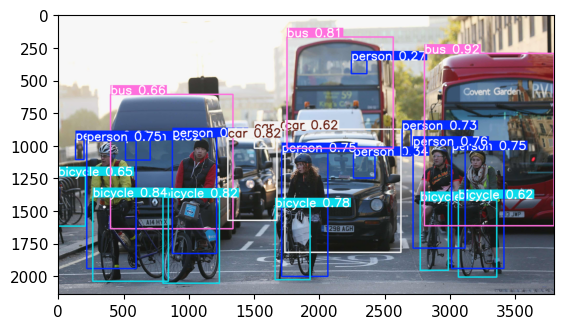

In [25]:
#to see the result
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
# to see the result matrix
results.render() #render is to get the result in list

[array([[[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ...,
         [247, 230, 204],
         [247, 230, 204],
         [247, 230, 204]],
 
        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ...,
         [247, 230, 204],
         [247, 230, 204],
         [247, 230, 204]],
 
        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ...,
         [247, 230, 204],
         [247, 230, 204],
         [247, 230, 204]],
 
        ...,
 
        [[117, 119, 132],
         [121, 123, 136],
         [128, 130, 143],
         ...,
         [103, 109, 121],
         [107, 113, 125],
         [112, 118, 130]],
 
        [[127, 129, 142],
         [127, 129, 142],
         [127, 129, 142],
         ...,
         [112, 118, 130],
         [110, 116, 128],
         [107, 113, 125]],
 
        [[127, 129, 142],
         [127, 129, 142],
         [127, 129, 142],
         ...,
         [112, 118, 130],
  

In [27]:
# to check the video
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
#import lib
import uuid   # Unique identifier
import os
import time

In [6]:
# here the code is based on linux/mac in that only posixpath will work for windows 
# need to convert the posixpath to windows path by using pathlib
import pathlib

temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [7]:
# need to import torch to load put model best.pt 
import torch

model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/best.pt")

Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


In [41]:
# img = os.path.join('data', 'images', 'bus.jpg')
# check using img
img = r'C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\yolov5\data\images\1.jpg'

In [42]:
results = model(img)

In [43]:
results.print()


image 1/1: 720x1280 1 cigarette
Speed: 43.7ms pre-process, 153.5ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


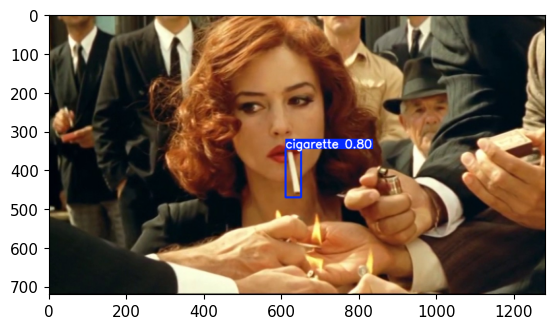

In [44]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 386x580 1 vape
Speed: 53.2ms pre-process, 199.3ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


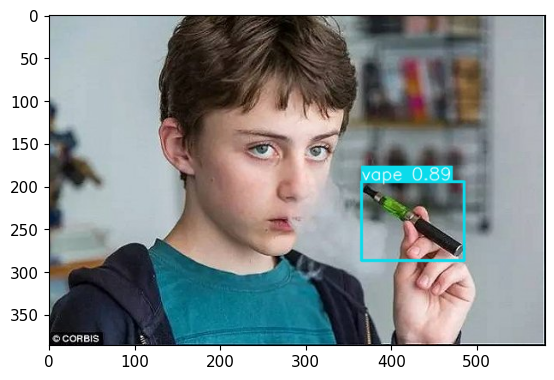

In [71]:
img = r'C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\yolov5\data\images\3.jpg'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 226x500 1 cigarette
Speed: 9.1ms pre-process, 106.6ms inference, 1.0ms NMS per image at shape (1, 3, 320, 640)


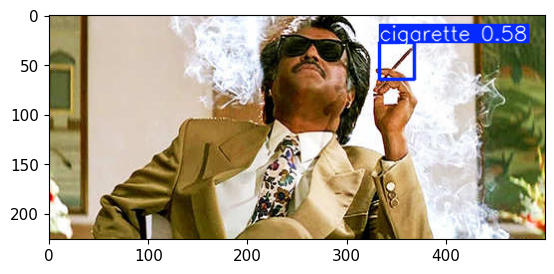

In [74]:
img = r'C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\yolov5\data\images\thumb.jpg'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 338x600 (no detections)
Speed: 20.7ms pre-process, 112.3ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


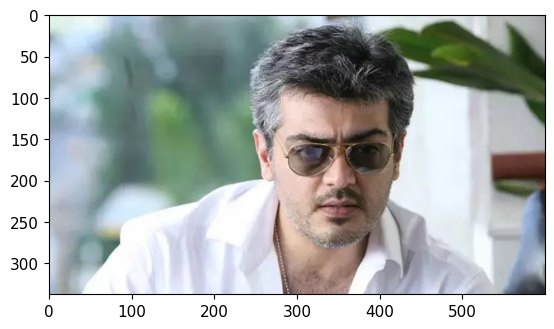

In [75]:
img = r'C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\yolov5\data\images\nosmoke.jpg'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [45]:
# check using webcam
cap = cv2.VideoCapture(0) # to access the webcam
while cap.isOpened(): # while camera on
    ret, frame = cap.read() # to read the frame
    
    # Make detections 
    results = model(frame) # here model is infused with frame this will detect
    
    cv2.imshow('YOLO', np.squeeze(results.render())) # this will show the results
    
    if cv2.waitKey(10) & 0xFF == ord('q'): # to exit
        break
cap.release()
cv2.destroyAllWindows()

# Alert message 

In [76]:
import cv2
import numpy as np
import torch

# Loading YOLOv5 model best.pt
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/best.pt")

# Function to perform object detection and alert if cigarette or vape is detected
def detect_and_alert(frame):
    # Performing object detection using best.pt
    results = model(frame)

    # Initialize alert flag
    alert = False

    # Check if there are any detections
    if results.pred:
        # Iterate through predictions 
        for detection in results.pred[0]:  # Iterate over the first dimension of the tensor
            label = int(detection[-1])  # Last element is label index
            if label in [0, 1]:  # 0 is cigarette and 1 is vape 
                alert = True
                # Perform alert action 
                cv2.putText(frame, "Cigarette or Vape Detected!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                print("Cigarette or Vape Detected!")

    return frame, alert

# Initialize video capture from default webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Perform detection and get modified frame and alert flag
    modified_frame, alert = detect_and_alert(frame)

    # Display the modified frame
    cv2.imshow('Object Detection', modified_frame)

    # Check for alert condition and perform corresponding action
    if alert:
        pass

    # Exit loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape De

In [54]:
# to give alert sound
# pip install pygame

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 320.0 kB/s eta 0:00:34
   ---------------------------------------- 0.0/10.8 MB 487.6 kB/s eta 0:00:22
    --------------------------------------- 0.2/10.8 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.8 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.8 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.8 MB 3.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/10.8 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.8 MB 4.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/10.8 MB 4.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.8 MB 4.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.8 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/10.8 MB 5.0 MB/s eta 0:00:02
  

# Without bounding box and confidence score

In [77]:
import cv2
import numpy as np
import torch
import pygame

# Initialize pygame mixer for sound
pygame.mixer.init()

# Load sound file 
alert_sound = pygame.mixer.Sound(r"C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\alert_sound.mp3")

# Load YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/best.pt")

# Function to perform object detection and alert if cigarette or vape is detected
def detect_and_alert(frame):
    # Perform object detection using your model
    results = model(frame)

    # Initialize alert flag
    alert = False

    # Check if there are any detections
    if results.pred:
        # Iterate through predictions
        for detection in results.pred[0]:  # Iterate over the first dimension of the tensor
            label = int(detection[-1])  # Last element is label index
            if label in [0, 1]: # 0 is cigarette and 1 is vape 
                alert = True
                # Play alert sound
                alert_sound.play()
                # Perform alert action 
                cv2.putText(frame, "Cigarette or Vape Detected!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                print("Cigarette or Vape Detected!")

    return frame, alert

# Initialize video capture from default webcam (index 0)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Perform detection and get modified frame and alert flag
    modified_frame, alert = detect_and_alert(frame)

    # Display the modified frame
    cv2.imshow('Object Detection', modified_frame)

    # Check for alert condition and perform corresponding action
    if alert:
        # Example: Play sound, send notification, etc.
        # Add your alert action here
        pass

    # Exit loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!
Cigarette or Vape Detected!


# Created Bounding box and the text in green color

In [95]:
import cv2
import numpy as np
import torch
import pygame

# Initialize pygame mixer for sound
pygame.mixer.init()

# Load sound file
alert_sound = pygame.mixer.Sound(r"C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\alert_sound.mp3")

# Load YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/best.pt")

# Function to perform object detection and alert if cigarette or vape is detected
def detect_and_alert(frame):
    # Perform object detection 
    results = model(frame)

    # Initialize alert flag
    alert = False

    # Check if there are any predictions
    if results.pred:
        # Iterate through predictions 
        for detection in results.pred[0]:  
            label = int(detection[-1])  # Last element is label index
            if label in [0, 1]:  # 0 is cigarette and 1 is vape 
                alert = True
                # Play alert sound
                alert_sound.play()

                # Extract bounding box coordinates
                bbox = detection[:4].int().tolist()  # Convert tensor to list of integers
                x1, y1, x2, y2 = bbox  # Unpack coordinates

                # Draw bounding box rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

                # Add label text near the bounding box
                label_text = model.module.names[label] if hasattr(model, 'module') else model.names[label]
                cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                print(f"{label_text} Detected!")

    return frame, alert

# Initialize video capture from default webcam (index 0)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Perform detection and get modified frame and alert flag
    modified_frame, alert = detect_and_alert(frame)

    # Display the modified frame
    cv2.imshow('Object Detection', modified_frame)

    # Check for alert condition and perform corresponding action
    if alert:
        
        pass

    # Exit loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


vape Detected!
vape Detected!
vape Detected!


# Created Bounding box and the text in red color with confidence score

In [84]:
import cv2
import numpy as np
import torch
import pygame

# Initialize pygame mixer for sound
pygame.mixer.init()

# Load sound file 
alert_sound = pygame.mixer.Sound(r"C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\alert_sound.mp3")

# Load YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/best.pt")

# Function to perform object detection and alert if cigarette or vape is detected
def detect_and_alert(frame):
    # Perform object detection 
    results = model(frame)

    # Initialize alert flag
    alert = False

    # Check if there are any predictions 
    if results.pred:
        # Iterate through predictions 
        for detection in results.pred[0]:  # Iterate over the first dimension of the tensor
            label = int(detection[-1])  # Last element is label index
            if label in [0, 1]:  #  0 is cigarette and 1 is vape 
                alert = True
                # Play alert sound
                alert_sound.play()

                # Extract bounding box coordinates
                bbox = detection[:4].int().tolist()  # Convert tensor to list of integers
                x1, y1, x2, y2 = bbox  # Unpack coordinates

                # Draw bounding box rectangle (change color to red)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

                # Add label text near the bounding box
                label_text = model.module.names[label] if hasattr(model, 'module') else model.names[label]
                label_value = detection[-2].item()  # Confidence score
                text = f"{label_text}: {label_value:.2f}"
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                print(f"{label_text} Detected with confidence: {label_value:.2f}")

    return frame, alert

# Initialize video capture from default webcam (index 0)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Perform detection and get modified frame and alert flag
    modified_frame, alert = detect_and_alert(frame)

    # Display the modified frame
    cv2.imshow('Object Detection', modified_frame)

    # Check for alert condition and perform corresponding action
    if alert:

        pass

    # Exit loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


cigarette Detected with confidence: 0.36
cigarette Detected with confidence: 0.54
cigarette Detected with confidence: 0.30
cigarette Detected with confidence: 0.32
cigarette Detected with confidence: 0.78
cigarette Detected with confidence: 0.67
cigarette Detected with confidence: 0.71
cigarette Detected with confidence: 0.72
cigarette Detected with confidence: 0.75
cigarette Detected with confidence: 0.74
cigarette Detected with confidence: 0.79
cigarette Detected with confidence: 0.69
cigarette Detected with confidence: 0.69
cigarette Detected with confidence: 0.63
cigarette Detected with confidence: 0.52
cigarette Detected with confidence: 0.71
cigarette Detected with confidence: 0.64
cigarette Detected with confidence: 0.32


# Final code

In [99]:
import cv2
import numpy as np
import torch
import pygame

# Initialize pygame mixer for sound
pygame.mixer.init()

# Load sound file 
alert_sound = pygame.mixer.Sound(r"C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\alert_sound.mp3")

# Load YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/best.pt")

# Function to perform object detection and alert if cigarette or vape is detected
def detect_and_alert(frame):
    # Perform object detection using your model
    results = model(frame)

    # Initialize alert flag
    alert = False

    # Check if there are any predictions 
    if results.pred:
        # Iterate through predictions (assuming results.pred is a tensor)
        for detection in results.pred[0]:  # Iterate over the first dimension of the tensor
            label = int(detection[-1])  # Last element is label index
            confidence = detection[-2].item()  # Confidence score
            if label in [0, 1] and confidence > 0.50:  #0 is cigarette and 1 is vape (adjust based on your label mapping)
                alert = True
                # Play alert sound
                alert_sound.play()

                # Extract bounding box coordinates
                bbox = detection[:4].int().tolist()  # Convert tensor to list of integers
                x1, y1, x2, y2 = bbox  # Unpack coordinates

                # Draw bounding box rectangle (change color to red)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

                # Add label text near the bounding box
                label_text = model.module.names[label] if hasattr(model, 'module') else model.names[label]
                text = f"{label_text}: {confidence:.2f}"
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                print(f"{label_text} Detected with confidence: {confidence:.2f}")

    return frame, alert

# Initialize video capture from default webcam (index 0)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Perform detection and get modified frame and alert flag
    modified_frame, alert = detect_and_alert(frame)

    # Display the modified frame
    cv2.imshow('Object Detection', modified_frame)

    # Check for alert condition and perform corresponding action
    if alert:

        pass

    # Exit loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


cigarette Detected with confidence: 0.52
vape Detected with confidence: 0.54
cigarette Detected with confidence: 0.79
cigarette Detected with confidence: 0.82
cigarette Detected with confidence: 0.57
cigarette Detected with confidence: 0.68
cigarette Detected with confidence: 0.74
cigarette Detected with confidence: 0.73
cigarette Detected with confidence: 0.60
cigarette Detected with confidence: 0.55
cigarette Detected with confidence: 0.57
cigarette Detected with confidence: 0.79
cigarette Detected with confidence: 0.80
cigarette Detected with confidence: 0.73
cigarette Detected with confidence: 0.63
cigarette Detected with confidence: 0.78
cigarette Detected with confidence: 0.68
cigarette Detected with confidence: 0.70
cigarette Detected with confidence: 0.70
cigarette Detected with confidence: 0.72
cigarette Detected with confidence: 0.69
cigarette Detected with confidence: 0.68
cigarette Detected with confidence: 0.69
cigarette Detected with confidence: 0.66
cigarette Detected wi

In [14]:
import cv2
import numpy as np
import torch
import pygame

# Initialize pygame mixer for sound
pygame.mixer.init()

# Load sound file 
alert_sound = pygame.mixer.Sound(r"C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\alert_sound.mp3")

# Load YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/best.pt")

# Function to perform object detection and alert if cigarette or vape is detected
def detect_and_alert(frame):
    # Perform object detection using your model
    results = model(frame)

    # Initialize alert flag
    alert = False

    # Check if there are any predictions 
    if results.pred:
        # Iterate through predictions (assuming results.pred is a tensor)
        for detection in results.pred[0]:  # Iterate over the first dimension of the tensor
            label = int(detection[-1])  # Last element is label index
            confidence = detection[-2].item()  # Confidence score
            if label in [0, 1] and confidence > 0.50:  #0 is cigarette and 1 is vape (adjust based on your label mapping)
                alert = True
                # Play alert sound
                alert_sound.play()

                # Extract bounding box coordinates
                bbox = detection[:4].int().tolist()  # Convert tensor to list of integers
                x1, y1, x2, y2 = bbox  # Unpack coordinates

                # Draw bounding box rectangle (change color to red)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

                # Add label text near the bounding box
                label_text = model.module.names[label] if hasattr(model, 'module') else model.names[label]
                text = f"{label_text}: {confidence:.2f}"
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                print(f"{label_text} Detected with confidence: {confidence:.2f}")

    return frame, alert

# Initialize video capture from MP4 file
video_path = r'C:\HOPE\Deep Learning\Smoking detection with Alert using PyTorch\v5.mp4'  # Replace with your MP4 file path
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    # Read frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Perform detection and get modified frame and alert flag
    modified_frame, alert = detect_and_alert(frame)

    # Display the modified frame
    cv2.imshow('Object Detection', modified_frame)

    # Check for alert condition and perform corresponding action
    if alert:
        pass  # Here you can perform any additional actions when an alert is detected

    # Exit loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\kathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 
